#### Import Modules

In [1]:
# Analysis
import numpy as np
import pandas as pd

# Plot Visualization
import matplotlib.pyplot as plt 

# Map Visualization
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import colors

#### Read the Data
- Collision Data
- Casualty Data
- LSOA Data

In [2]:
adf = pd.read_csv("Data/dft-road-casualty-statistics-collision-2022.csv", dtype={"accident_index": str, "accident_reference": str})
adf = adf.astype(str)
adf.replace('-1', pd.NA, inplace=True)
adf.describe()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
count,106004,106004,106004,106004,106004,106004,106004,106004,106004,106004,...,105315,106003,106004,105310,105258,105258,106004,106004,98564,101856
unique,106004,1,106004,85481,85711,103897,102680,44,3,14,...,7,5,9,6,9,7,3,3,2,26848
top,2022010352073,2022,010352073,nan,nan,nan,nan,1,3,2,...,0,1,1,1,0,0,1,1,2,E01004736
freq,1,106004,1,22,22,22,22,23327,81069,65507,...,79952,75961,86939,78784,101033,101449,71763,72879,91793,123


In [3]:
cdf = pd.read_csv("Data/dft-road-casualty-statistics-casualty-2022.csv", dtype={"accident_index": str, "accident_reference": str})
cdf = cdf.astype(str)
cdf.replace('-1', pd.NA, inplace=True)
cdf.describe()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
count,135480,135480,135480,135480,135480,135480,134403,132351,132351,135480,135477,135479,134855,135411,135220,135451,122184,121526,116799
unique,106004,1,106004,17,19,3,3,102,11,3,11,10,4,6,3,22,3,10,31104
top,2022010356595,2022,010356595,1,1,1,1,18,6,3,0,0,0,0,0,9,1,2,E01019456
freq,16,135480,16,80304,104962,89770,82746,3407,27952,107949,116153,116153,112590,133568,132645,72759,98949,15159,65


In [4]:
gdf = gpd.read_file("Data/Lower_Super_Output_Area_(LSOA)_IMD2019__(WGS84).geojson")
gdf.sample(5)

,FID,lsoa11cd,lsoa11nm,IMDRank,IMDDecil,Shape__Area,Shape__Length,geometry
16538,16539,E01018066,Fenland 004A,6854,3,1.278121e+07,22823.797612,"POLYGON ((0.16835 52.64190, 0.16991 52.64145, ..."
16962,16963,E01016762,Milton Keynes 005A,12759,4,1.610046e+06,8113.249954,"POLYGON ((-0.75469 52.07669, -0.75481 52.07536..."
7754,7755,E01006763,Liverpool 020C,2714,1,3.379846e+05,3047.265090,"POLYGON ((-2.92932 53.43019, -2.92949 53.43006..."
25355,25356,E01025701,Charnwood 002C,6514,2,6.049252e+05,4622.582862,"POLYGON ((-1.19766 52.77096, -1.19719 52.77093..."
9150,9151,E01008916,Birmingham 037E,606,1,6.965568e+05,5142.918868,"POLYGON ((-1.88317 52.51336, -1.88088 52.51140..."


#### Visualize LSOAs

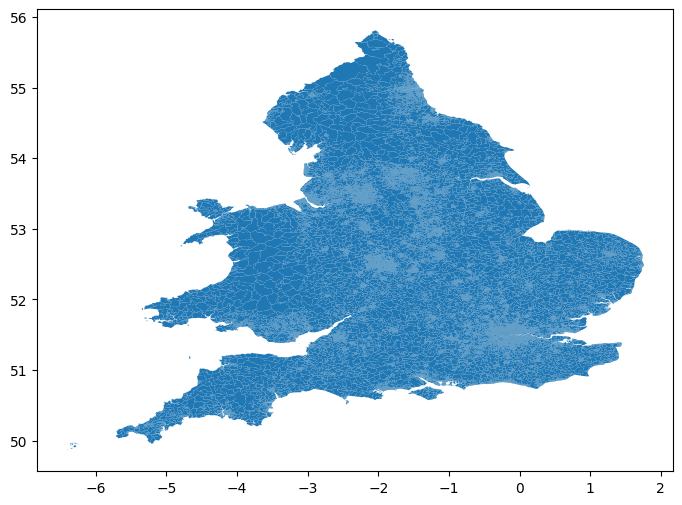

In [12]:
gdf2 = gdf.copy()

fig, ax = plt.subplots(figsize=(10, 6))
gdf2.plot(ax=ax)
plt.axis('scaled')
plt.show()

In [13]:
# save the plot
fig.savefig('Plots/lsoas.jpg', bbox_inches='tight')

#### LSOA (Lower Layer Super Output Area) of Casualty (lsoa_of_casualty)

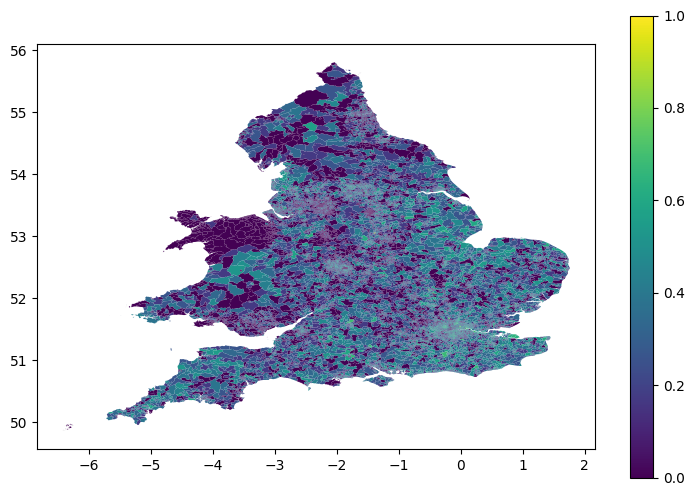

In [17]:
cdf2 = cdf.copy()
gdf2 = gdf.copy()

cdf_variable = 'lsoa_of_casualty'
gdf_variable = 'lsoa11cd'

statistics = cdf2[cdf_variable].value_counts(normalize=False, sort=False).reset_index()
norm = colors.SymLogNorm(linthresh=0.5)
statistics['normed_count'] = norm(statistics['count']).data
statistics.rename(columns={cdf_variable: gdf_variable}, inplace=True)

merged_gdf = pd.merge(gdf2, statistics, on=gdf_variable, how='left')
merged_gdf = merged_gdf.fillna(0)
fig, ax = plt.subplots(figsize=(9, 6))
merged_gdf.plot(ax=ax, column='normed_count', cmap='viridis', legend=True)
plt.axis('scaled')  # Adjust the axis to be scaled
plt.show()

In [18]:
# save the plot
fig.savefig('Plots/lsoa_of_casualty.jpg', bbox_inches='tight')

#### LSOA of Most Deprived Casualties

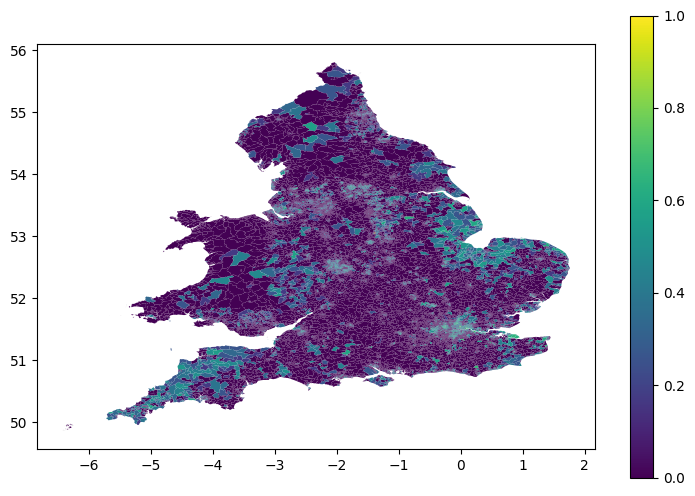

In [20]:
cdf2 = cdf.copy()
gdf2 = gdf.copy()

cdf_variable = 'lsoa_of_casualty'
gdf_variable = 'lsoa11cd'

statistics = cdf2[cdf2['casualty_imd_decile'].isin(['1', '2', '3', '4', '5'])][cdf_variable].value_counts(normalize=False, sort=False).reset_index()
norm = colors.SymLogNorm(linthresh=0.5)
statistics['normed_count'] = norm(statistics['count']).data
statistics.rename(columns={cdf_variable: gdf_variable}, inplace=True)

merged_gdf = pd.merge(gdf2, statistics, on=gdf_variable, how='left')
merged_gdf = merged_gdf.fillna(0)
fig, ax = plt.subplots(figsize=(9, 6))
merged_gdf.plot(ax=ax, column='normed_count', cmap='viridis', legend=True)
plt.axis('scaled')  # Adjust the axis to be scaled
plt.show()

In [21]:
# save the plot
fig.savefig('Plots/lsoa_most_deprived.jpg', bbox_inches='tight')

#### LSOA of Least Deprived Casualties

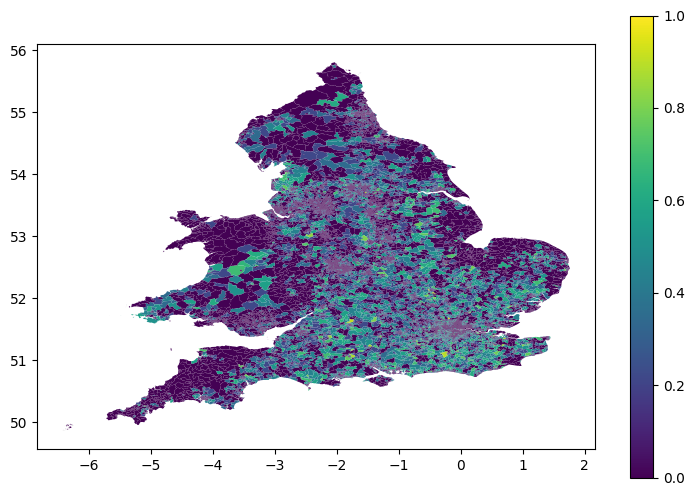

In [22]:
cdf2 = cdf.copy()
gdf2 = gdf.copy()

cdf_variable = 'lsoa_of_casualty'
gdf_variable = 'lsoa11cd'

statistics = cdf2[cdf2['casualty_imd_decile'].isin(['6', '7', '8', '9', '10'])][cdf_variable].value_counts(normalize=False, sort=False).reset_index()
norm = colors.SymLogNorm(linthresh=0.5)
statistics['normed_count'] = norm(statistics['count']).data
statistics.rename(columns={cdf_variable: gdf_variable}, inplace=True)

merged_gdf = pd.merge(gdf2, statistics, on=gdf_variable, how='left')
merged_gdf = merged_gdf.fillna(0)
fig, ax = plt.subplots(figsize=(9, 6))
merged_gdf.plot(ax=ax, column='normed_count', cmap='viridis', legend=True)
plt.axis('scaled')  # Adjust the axis to be scaled
plt.show()

In [23]:
# save the plot
fig.savefig('Plots/lsoa_least_deprived.jpg', bbox_inches='tight')

#### Locations of Casualties or Accidents for High Deprived Ones

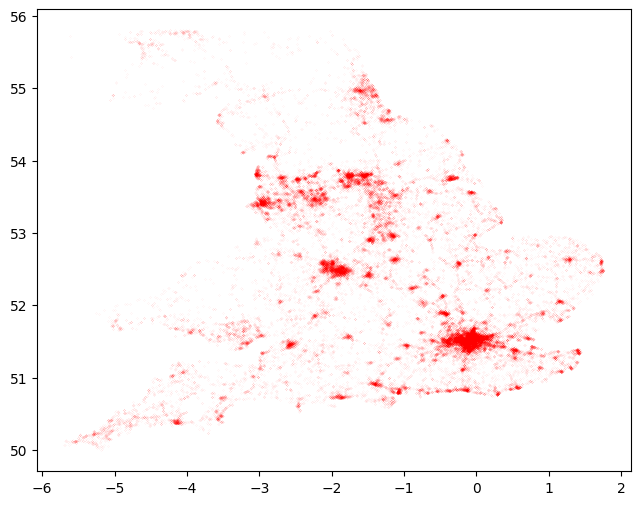

In [47]:
adf2 = adf.copy()
cdf2 = cdf.copy()

variable = 'accident_reference'

merged_df = pd.merge(cdf2, adf2, on=variable, how='left')
merged_df = merged_df[merged_df['casualty_imd_decile'].isin(['1', '2', '3', '4', '5'])]
merged_df = merged_df[merged_df['latitude'].values.astype('float') < 55.8]

aloc_geometry = [Point(merged_df.iloc[i]['longitude'], merged_df.iloc[i]['latitude']) for i in range(len(merged_df))]
alocs = gpd.GeoDataFrame({
    'ID': list(range(len(aloc_geometry))),
    'geometry': aloc_geometry
})

fig, ax = plt.subplots(figsize=(9, 6))
alocs.plot(ax=ax, color='red', markersize=0.0005, label='Points')
plt.show()

In [48]:
# save the plot
fig.savefig('Plots/location_high_deprived.jpg', bbox_inches='tight')

#### Locations of Casualties or Accidents for Low Deprived Ones

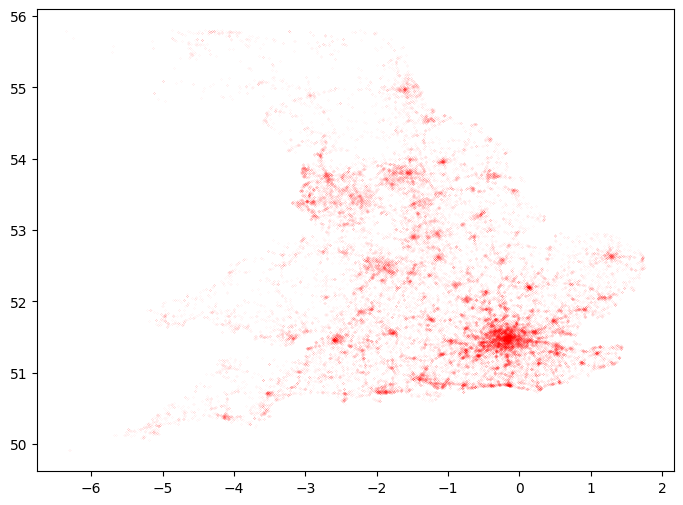

In [49]:
adf2 = adf.copy()
cdf2 = cdf.copy()

variable = 'accident_reference'

merged_df = pd.merge(cdf2, adf2, on=variable, how='left')
merged_df = merged_df[merged_df['casualty_imd_decile'].isin(['6', '7', '8', '9', '10'])]
merged_df = merged_df[merged_df['latitude'].values.astype('float') < 55.8]

aloc_geometry = [Point(merged_df.iloc[i]['longitude'], merged_df.iloc[i]['latitude']) for i in range(len(merged_df))]
alocs = gpd.GeoDataFrame({
    'ID': list(range(len(aloc_geometry))),
    'geometry': aloc_geometry
})

fig, ax = plt.subplots(figsize=(9, 6))
alocs.plot(ax=ax, color='red', markersize=0.0005, label='Points')
plt.show()

In [50]:
# save the plot
fig.savefig('Plots/location_low_deprived.jpg', bbox_inches='tight')